# Homework 5 - Assignment 1

### Response authored by: JKtours (jlk635)


In [1]:
#Usual packages for import including spicy_stats

from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import scipy.stats;



Populating the interactive namespace from numpy and matplotlib


## Instructions 

(all simulated data)

Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).
Grading:

you must:

plot your original distribution

plot at least one of the samples

plot the distribution of z statistics

fit the z-statistics with a gaussian model and assess the goodness of fit with a simple test (AD or KS).

find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.

plots need have caption, axis labels, etx and comment your figures and test results appropriately (to demonstrate your understanding).

## Response

Generate N = 103 samples from the exponential distribution (with mean = 99, standard deviation = 99 also). The size of each sample is n = 31.

In [2]:
#set parameters

N = 103  #number of samples
distrMean = 99  #mean of distribution to be sampling from


n = 31 #size of each sample


The exponential distribution with mean = standard dev. = 99 is plotted as follows.

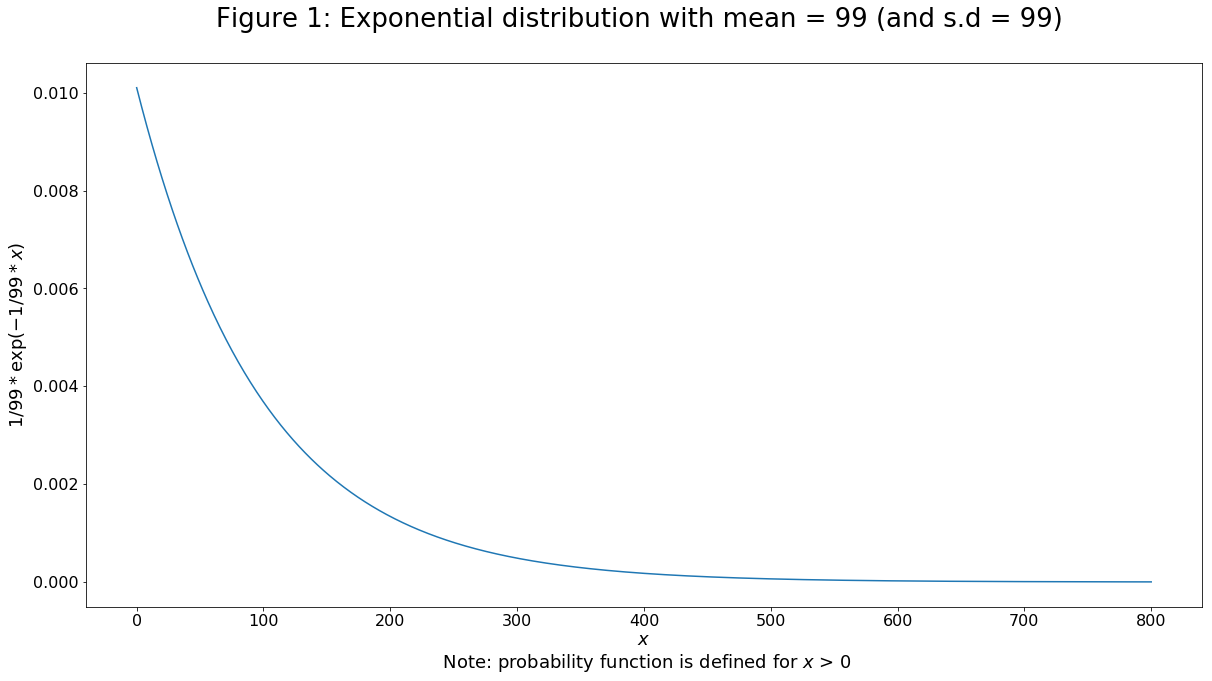

In [3]:
distStdDev = distrMean # exponential distribution has standard deviation the same as the mean

x = np.linspace(0, 800, 1000)
y = (1 / distrMean) * np.exp(-1 * (1 / distrMean) * x)

plt.figure(figsize = (20,10))
plt.tick_params(axis='both',labelsize=16)
plt.plot(x, y)
plt.title("Figure 1: Exponential distribution with mean = 99 (and s.d = 99) \n", fontsize = 26)
plt.xlabel('$x$ \n Note: probability function is defined for $x$ > 0', fontsize = 18)
plt.ylabel('$1 / 99 * \exp(-1/99*x)$', fontsize = 18)


plt.show()

#### Figure 1: Probability density function for exponential distribution with mean = 99

In [4]:
distrSamples = np.zeros((N,n))

In [5]:
np.random.seed(88)

for i in range(len(distrSamples)):
    distrSamples[i] = np.random.exponential(scale=distrMean, size=n)


Plot one of the samples.

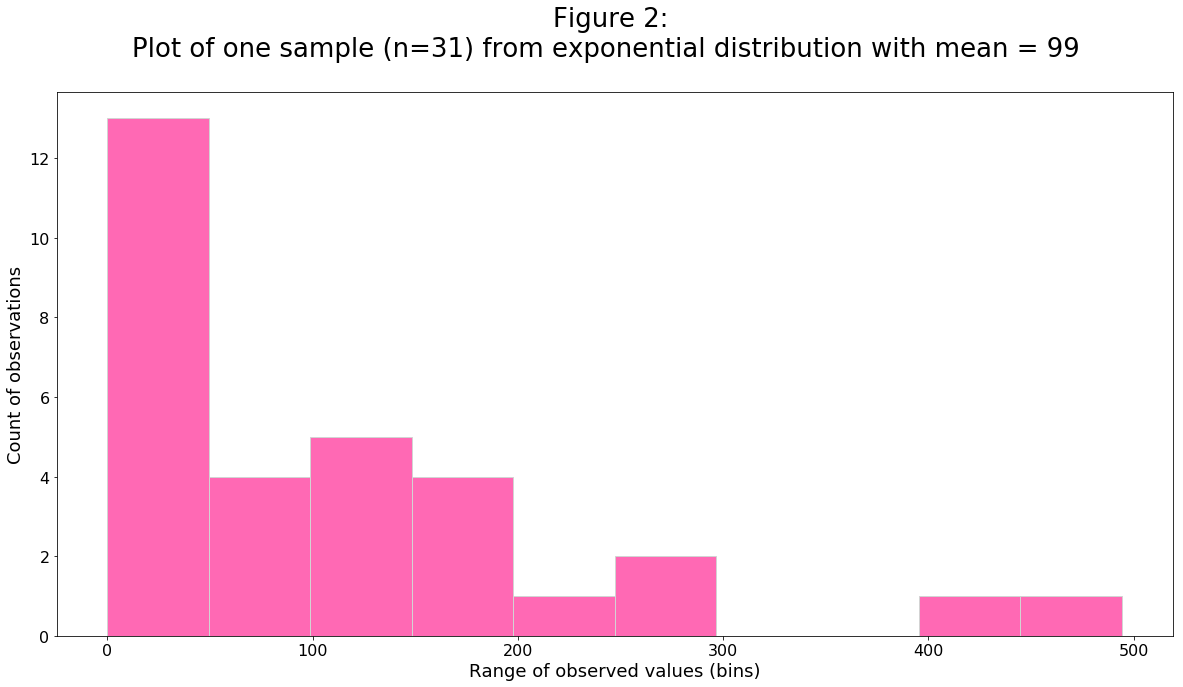

In [6]:

plt.figure(figsize = (20,10))
plt.tick_params(axis='both',labelsize=16)

plt.hist(distrSamples[82], color='hotpink', edgecolor = 'lightgray')

plt.title("Figure 2: \nPlot of one sample (n=31) from exponential distribution with mean = 99  \n", fontsize = 26)
plt.xlabel('Range of observed values (bins)', fontsize = 18)
plt.ylabel('Count of observations', fontsize = 18);




#### Figure 2: Histogram of one of the samples generated from exponential distribution with mean = 99

*Note: there were over 100 samples generated, with sample size = 31*

Calculate the mean of each of the samples

In [7]:
meansOfSamples = distrSamples.mean(axis=1)

In [8]:

zStatistics = (meansOfSamples - distrMean) / (distStdDev / np.sqrt(n))


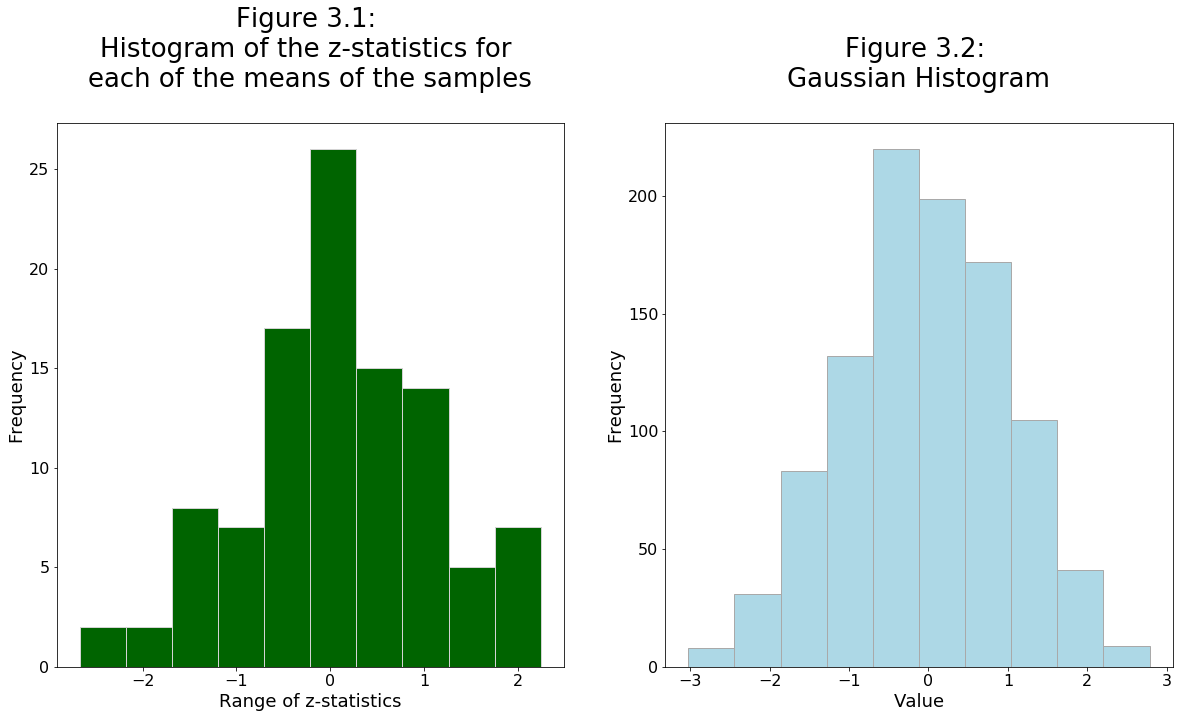

In [9]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(121)
plt.tick_params(axis='both',labelsize=16)

plt.hist(zStatistics, color='darkgreen', edgecolor = 'lightgray')

plt.title("Figure 3.1: \nHistogram of the z-statistics for \neach of the means of the samples\n", fontsize = 26)
plt.xlabel('Range of z-statistics', fontsize = 18)
plt.ylabel("Frequency", fontsize = 18);

ax = fig.add_subplot(122)
plt.tick_params(axis='both',labelsize=16)
gaussian_numbers = np.random.randn(1000)
plt.hist(gaussian_numbers, color='lightblue', edgecolor = 'darkgray')
plt.title("Figure 3.2: \nGaussian Histogram\n", fontsize = 26)
plt.xlabel("Value", fontsize = 18)
plt.ylabel("Frequency", fontsize = 18);


#### Figure 3.1: Histogram of z-statistics of sample means from the sampled distribution (exponential)
#### Figure 3.2: Histrogram of Gaussian distribution

We want to compare if the distribution of z-statistics follows a Gaussian distribution, i.e. compare the dark green histogram (z-statistics) above with the light blue one (Gaussian). The z-statistics do appear to follow a Gaussian shape with observed symmetry. Let's test it.

*Note: there are different sample sizes for the two samples (as observed by the Frequency axis in both of the charts). This does not matter for the KS test*

## NULL HYPOTHESIS: Samples are generated from the same underlying distribution (e.g. testing are the samples the 'same') 

Significance level: $\alpha$ = *0.05*

$H_0$: $s_0$ = $s_1$

$H_1$: $s_0$ $\neq$ $s_1$


In [10]:
scipy.stats.ks_2samp(zStatistics, gaussian_numbers)


Ks_2sampResult(statistic=0.1269417475728161, pvalue=0.090819472867660192)

As the test statistic is 0.1269, and p-value equal to 0.0908 which is greated than our significance level ($\alpha$ = *0.05*), we fail to reject the null hypothesis and conclude that the samples may come from the same distribution.

### END